In [1]:
# Todo 리스트
# - 데이터의 구조 파악
#   - 데이터 크기, 특징(칼럼)개수, 데이터 형식 확인
# - 기술 통계 분석
#   - 연속형 데이터인 각 특성(칼럼)별 대표값, 분산도를 확인해보세요.
#   - 범주형 데이터별로 구분해서 한번 더 확인해보세요. (groupby, pivot_table 활용)
#       - 대표값(얼마나 모여있는가?) : 최빈치, 중앙치, 평균
#       - 분산도(얼마나 퍼져있는가?) : 범위, 사분편차, 분산, 표준편차
# - 데이터 시각화

## 데이터 구조 파악

In [2]:
import pandas as pd

directory = "./cleaned_data/"

# ▶ 분석할 파일 목록 설정 (파일 경로는 실제 위치에 맞게 수정)
file_paths = {
    "dust_1701Q": directory + "dust_1701Q_dust.csv",
    "dust_1702Q": directory + "dust_1702Q_dust.csv",
    "dust_1703Q": directory + "dust_1703Q_dust.csv",
    "dust_1704Q": directory + "dust_1704Q_dust.csv",
    "dust_1801Q": directory + "dust_1801Q_dust.csv",
    "dust_1802Q": directory + "dust_1802Q_dust.csv",
    "dust_1803Q": directory + "dust_1803Q_dust.csv",
    "sales_POS": directory + "sales_20190509_mask_POS.csv",
    "weather_2017": directory + "weather_SURFACE_air_pollution_2017.csv",
    "weather_2018": directory + "weather_SURFACE_air_pollution_2018.csv"
}

# ▶ 데이터 구조를 저장할 리스트
structure_info = []

# ▶ 각 파일에 대해 구조 확인
for name, path in file_paths.items():
    try:
        df = pd.read_csv(path)
        info = {
            "파일명": name,
            "데이터 크기": df.shape,
            "칼럼 개수": len(df.columns),
            "칼럼 목록": df.columns.tolist(),
            "데이터 타입": df.dtypes.astype(str).to_dict()
        }
    except Exception as e:
        info = {
            "파일명": name,
            "데이터 크기": "불러오기 실패",
            "칼럼 개수": "N/A",
            "칼럼 목록": [],
            "데이터 타입": f"에러: {e}"
        }
    structure_info.append(info)

# ▶ 요약 정보 출력
summary_df = pd.DataFrame(structure_info)
print(summary_df)

            파일명        데이터 크기  칼럼 개수  \
0    dust_1701Q  (160089, 10)     10   
1    dust_1702Q  (185120, 10)     10   
2    dust_1703Q  (176422, 10)     10   
3    dust_1704Q  (203026, 10)     10   
4    dust_1801Q  (229135, 10)     10   
5    dust_1802Q  (261437, 10)     10   
6    dust_1803Q  (273181, 10)     10   
7     sales_POS   (54536, 13)     13   
8  weather_2017    (7248, 23)     23   
9  weather_2018    (7406, 23)     23   

                                               칼럼 목록  \
0  [측정소명, 측정일시, SO2, CO, O3, NO2, PM10, PM25, PM1...   
1  [측정소명, 측정일시, SO2, CO, O3, NO2, PM10, PM25, PM1...   
2  [측정소명, 측정일시, SO2, CO, O3, NO2, PM10, PM25, PM1...   
3  [측정소명, 측정일시, SO2, CO, O3, NO2, PM10, PM25, PM1...   
4  [측정소명, 측정일시, SO2, CO, O3, NO2, PM10, PM25, PM1...   
5  [측정소명, 측정일시, SO2, CO, O3, NO2, PM10, PM25, PM1...   
6  [측정소명, 측정일시, SO2, CO, O3, NO2, PM10, PM25, PM1...   
7  [Calendar Day일 2, POS Category Code, 품목명, Manu...   
8  [일시, 기온(°C), 강수량(mm), 풍속(m/s), 습도(%), 증기압(hPa)...   

## 기술통계 분석

In [ ]:
import numpy as np
import os

# -------------------------------
# 1. 기술 통계 함수 정의
# -------------------------------
def compute_descriptive_stats(df, numeric_cols, group_cols=None):
    results = []

    if group_cols:
        grouped = df.groupby(group_cols)
    else:
        grouped = [('전체', df)]

    for name, group in grouped:
        name = (name,) if not isinstance(name, tuple) else name
        stat_dict = {f'그룹_{i+1}': n for i, n in enumerate(name)}
        
        for col in numeric_cols:
            data = group[col].dropna()
            if data.empty:
                continue
            stat_dict[f'{col}_최빈값'] = data.mode().iloc[0] if not data.mode().empty else np.nan
            stat_dict[f'{col}_중앙값'] = np.median(data)
            stat_dict[f'{col}_평균'] = np.mean(data)
            stat_dict[f'{col}_범위'] = np.max(data) - np.min(data)
            stat_dict[f'{col}_사분편차'] = data.quantile(0.75) - data.quantile(0.25)
            stat_dict[f'{col}_분산'] = np.var(data)
            stat_dict[f'{col}_표준편차'] = np.std(data)
        
        results.append(stat_dict)
    
    return pd.DataFrame(results)

# -------------------------------
# 2. 파일 경로 설정
# -------------------------------
dust_files = [
    "dust_1701Q_dust.csv", "dust_1702Q_dust.csv", "dust_1703Q_dust.csv",
    "dust_1704Q_dust.csv", "dust_1801Q_dust.csv", "dust_1802Q_dust.csv", "dust_1803Q_dust.csv"
]
weather_files = [
    "weather_SURFACE_air_pollution_2017.csv",
    "weather_SURFACE_air_pollution_2018.csv"
]
sales_file = "sales_20190509_mask_POS.csv"

# -------------------------------
# 3. 데이터 로드
# -------------------------------
dust_df = pd.concat([pd.read_csv(os.path.join(directory, f)) for f in dust_files], ignore_index=True)
weather_df = pd.concat([pd.read_csv(os.path.join(directory, f)) for f in weather_files], ignore_index=True)
sales_df = pd.read_csv(os.path.join(directory, sales_file))

# -------------------------------
# 4. 변수 설정
# -------------------------------
dust_numeric_cols = ['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']
weather_numeric_cols = [col for col in weather_df.columns if weather_df[col].dtype in [np.float64, np.int64]]
sales_numeric_cols = ['Sales Amt', 'Sales (Bag)', 'Sales SU', 'Unit Price', '금액']

# -------------------------------
# 5. 기술 통계 분석 실행
# -------------------------------

## (1) 대기오염 데이터: PM10 + PM25 등급 조합 기준
dust_stats = compute_descriptive_stats(dust_df, dust_numeric_cols, group_cols=['PM10 등급', 'PM25 등급'])

## (2) 날씨 데이터: 습도범주 기준
weather_stats = compute_descriptive_stats(weather_df, weather_numeric_cols, group_cols=['습도범주'])

## (3) 마스크 판매 데이터: 할인여부, 계절, 유통사
sales_stats_discount = compute_descriptive_stats(sales_df, sales_numeric_cols, group_cols=['할인여부'])
sales_stats_season = compute_descriptive_stats(sales_df, sales_numeric_cols, group_cols=['계절'])
sales_stats_distributor = compute_descriptive_stats(sales_df, sales_numeric_cols, group_cols=['유통사'])

# -------------------------------
# 6. 결과 저장
# -------------------------------
dust_stats.to_csv("./stats/dust_stats_PM10_PM25.csv", index=False)
weather_stats.to_csv("./stats/weather_stats_by_humidity.csv", index=False)
sales_stats_discount.to_csv("./stats/sales_stats_by_discount.csv", index=False)
sales_stats_season.to_csv("./stats/sales_stats_by_season.csv", index=False)
sales_stats_distributor.to_csv("./stats/sales_stats_by_distributor.csv", index=False)


## 시각화

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


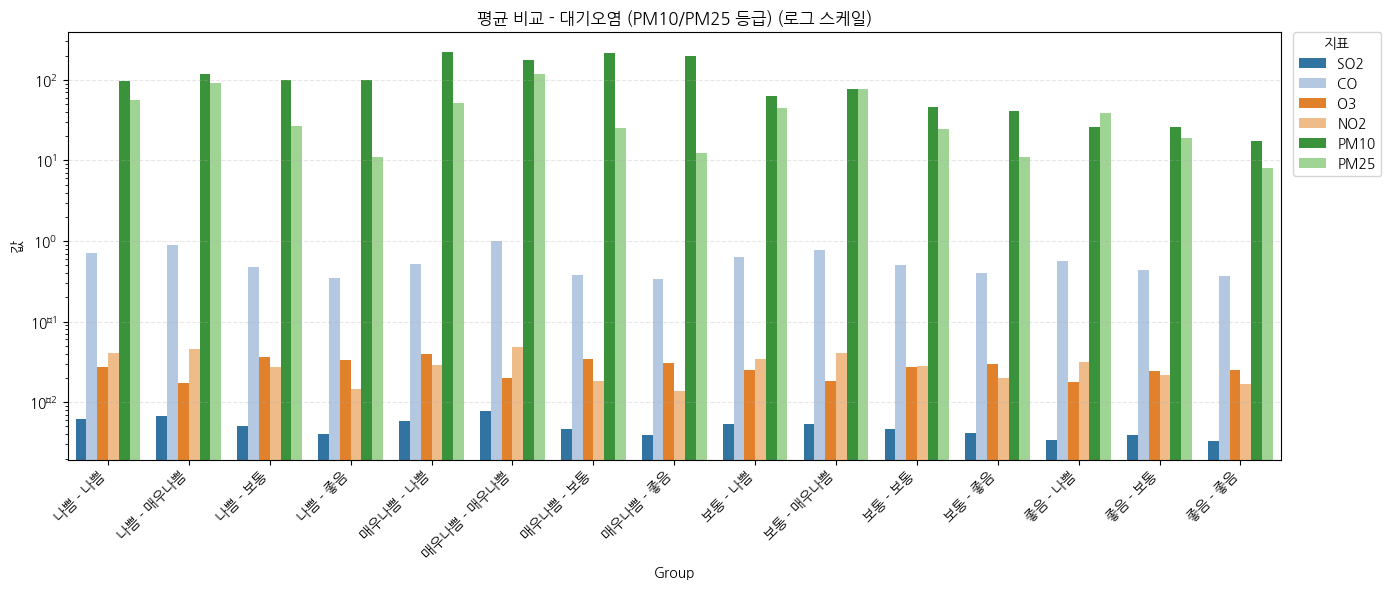

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


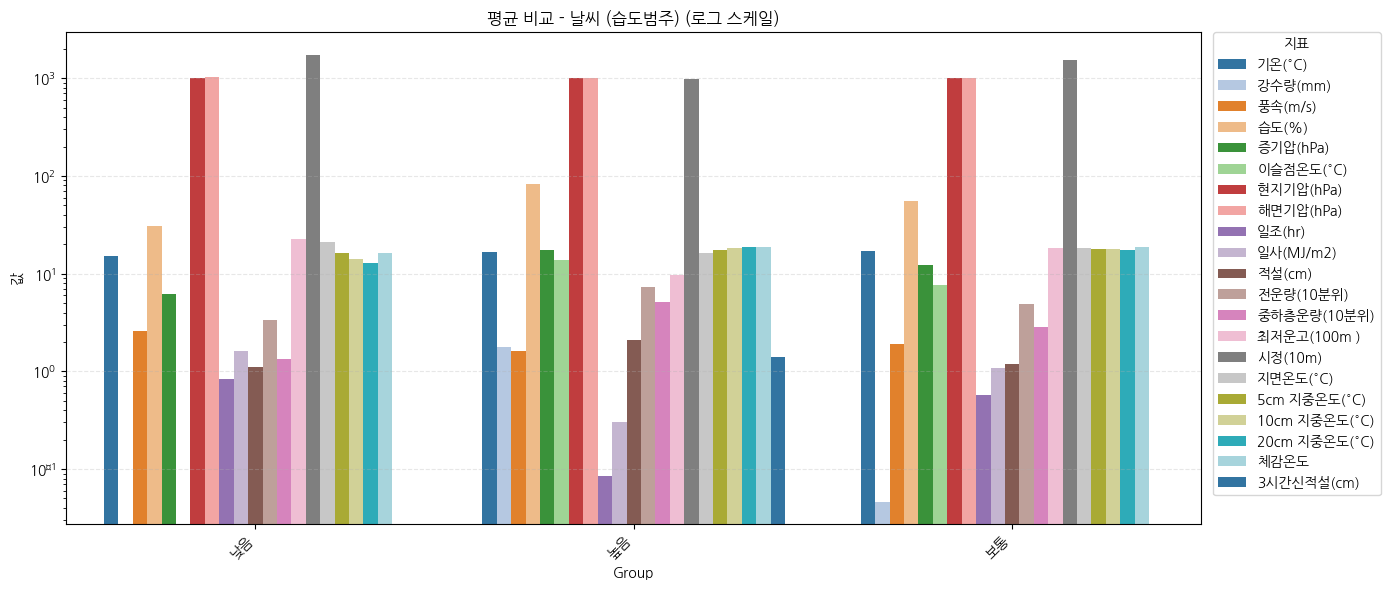

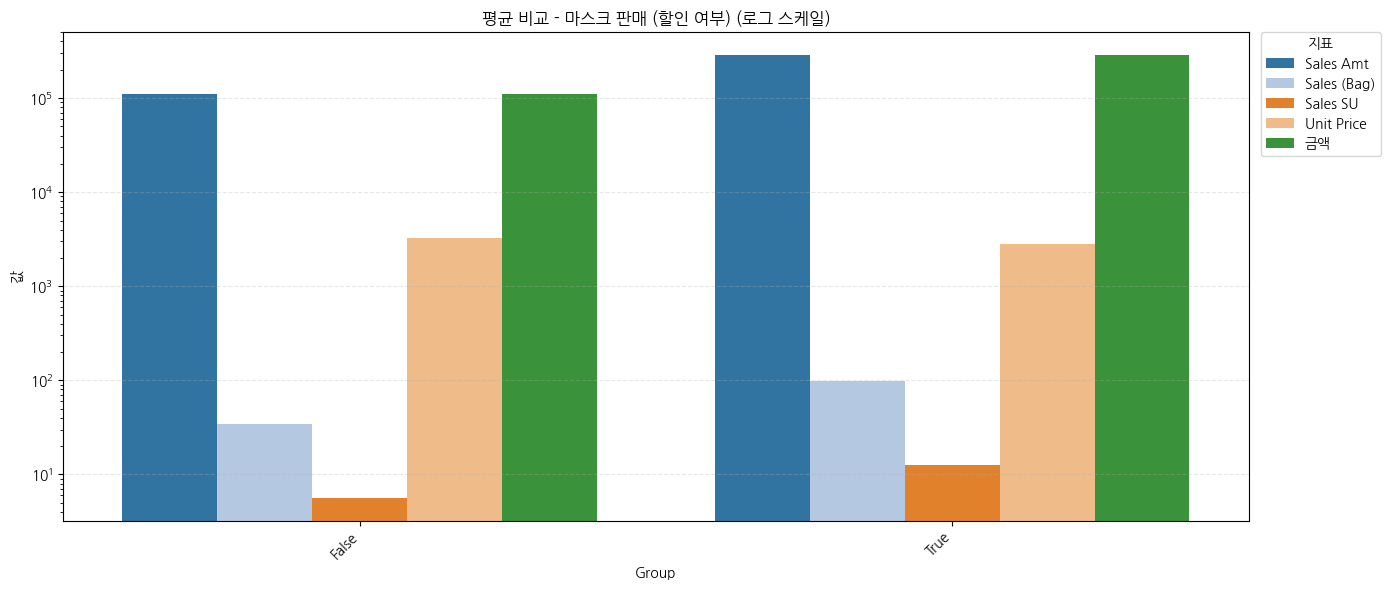

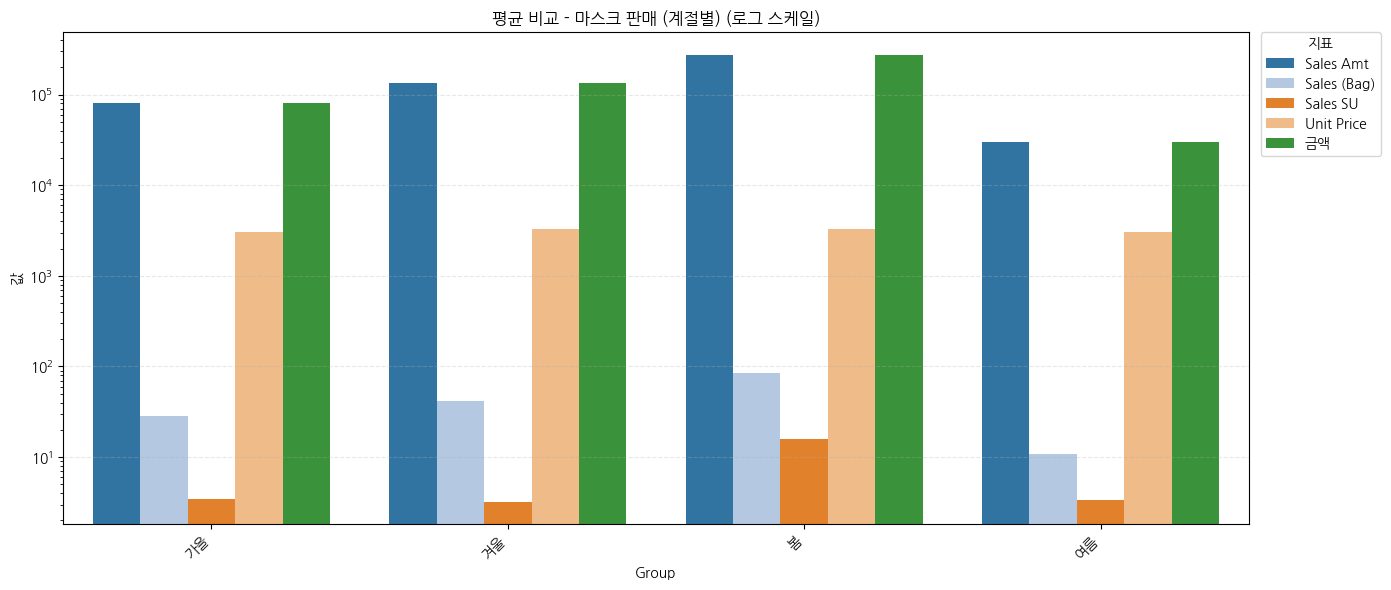

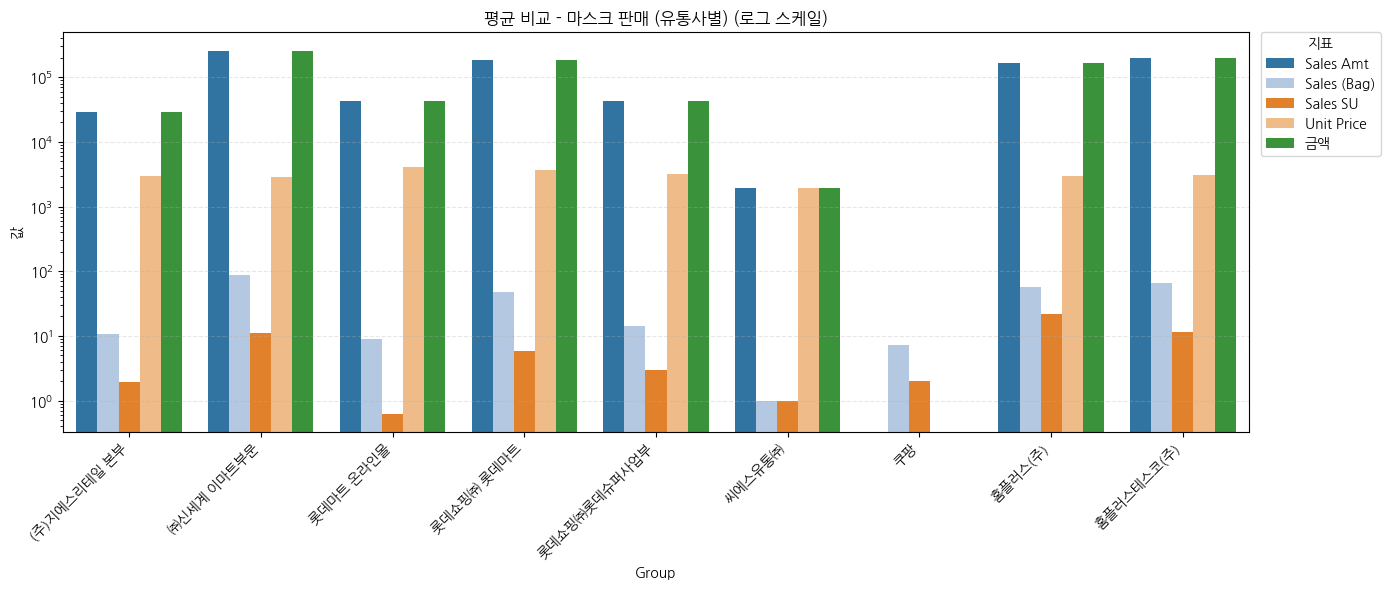

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'NanumGothic' # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 깨짐 방지

directory = "./stats/"  # 결과 CSV가 저장된 경로

# 시각화 함수 정의
def plot_grouped_bar_chart(df, group_cols, variable_keyword='평균', top_n=20, title_suffix=""):
    import matplotlib.pyplot as plt
    import seaborn as sns

    # 컬럼 필터링 및 그룹 결합
    cols_to_plot = [col for col in df.columns if variable_keyword in col and not col.startswith("그룹")]
    df['Group'] = df[group_cols].astype(str).agg(' - '.join, axis=1)

    # melt 변형
    melted_df = df.melt(id_vars='Group', value_vars=cols_to_plot,
                        var_name='지표', value_name='값')
    melted_df['지표'] = melted_df['지표'].str.replace(f'_{variable_keyword}', '', regex=False)

    # 색상 팔레트: 많아도 구분되도록
    unique_labels = melted_df['지표'].nunique()
    palette = sns.color_palette("tab20", n_colors=unique_labels)

    # 그래프
    plt.figure(figsize=(14, 6))
    ax = sns.barplot(data=melted_df, x='Group', y='값', hue='지표', palette=palette, dodge=True)
    ax.set_yscale("log")  # 로그 스케일
    plt.xticks(rotation=45, ha='right')
    plt.title(f"{variable_keyword} 비교 - {title_suffix} (로그 스케일)")

    # ✅ 범례 오른쪽 바깥으로 이동
    plt.legend(title='지표', bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)

    # ✅ 격자선 및 레이아웃 보정
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

# ---------------------------
# 1. 대기오염 통계 시각화
# ---------------------------
dust_stats = pd.read_csv(directory + "dust_stats_PM10_PM25.csv")
plot_grouped_bar_chart(dust_stats, group_cols=['그룹_1', '그룹_2'], variable_keyword='평균', title_suffix='대기오염 (PM10/PM25 등급)')

# ---------------------------
# 2. 날씨 통계 시각화
# ---------------------------
weather_stats = pd.read_csv(directory + "weather_stats_by_humidity.csv")
plot_grouped_bar_chart(weather_stats, group_cols=['그룹_1'], variable_keyword='평균', title_suffix='날씨 (습도범주)')

# ---------------------------
# 3. 마스크 판매 통계 시각화
# ---------------------------
sales_discount = pd.read_csv(directory + "sales_stats_by_discount.csv")
sales_season = pd.read_csv(directory + "sales_stats_by_season.csv")
sales_distributor = pd.read_csv(directory + "sales_stats_by_distributor.csv")

plot_grouped_bar_chart(sales_discount, group_cols=['그룹_1'], variable_keyword='평균', title_suffix='마스크 판매 (할인 여부)')
plot_grouped_bar_chart(sales_season, group_cols=['그룹_1'], variable_keyword='평균', title_suffix='마스크 판매 (계절별)')
plot_grouped_bar_chart(sales_distributor, group_cols=['그룹_1'], variable_keyword='평균', title_suffix='마스크 판매 (유통사별)')

In [14]:
# 상관관계 분석을 위한 판매 데이터 일부 복사

# 1백만 건 이하 샘플 추출
chunks = pd.read_csv('./cleaned_data/sales_20190509_mask_POS.csv', chunksize=100000)

filtered_chunks = []
for chunk in chunks:
    chunk['날짜'] = pd.to_datetime(chunk['Calendar Day일 2'], errors='coerce')
    filtered = chunk[
        (chunk['날짜'] >= '2017-10-01') & (chunk['날짜'] <= '2018-05-31')
    ]
    filtered_chunks.append(filtered)
    if sum(len(f) for f in filtered_chunks) > 500000:
        break  # 메모리 고려하여 일부만 추출

sample_df = pd.concat(filtered_chunks)
sample_df.to_csv('./correlation/sales_201710_201805.csv', index=False)

In [15]:
from collections import defaultdict

directory = "./cleaned_data/"

### 1. 판매 데이터 (큰 파일) 전처리
sales_file = "sales_201710_201805.csv"
sales_cols = ['Calendar Day일 2', 'Sales Amt', 'Sales SU', 'Unit Price', '금액']

sales_accum = defaultdict(lambda: {'Sales Amt': 0, 'Sales SU': 0, 'Unit Price': 0, '금액': 0, 'count': 0})

for chunk in pd.read_csv("./correlation/" + sales_file, usecols=sales_cols, chunksize=100_000, encoding='utf-8'):
    chunk['날짜'] = pd.to_datetime(chunk['Calendar Day일 2'], errors='coerce').dt.date
    chunk = chunk.dropna(subset=['날짜'])
    for _, row in chunk.iterrows():
        d = row['날짜']
        sales_accum[d]['Sales Amt'] += row.get('Sales Amt', 0)
        sales_accum[d]['Sales SU'] += row.get('Sales SU', 0)
        sales_accum[d]['Unit Price'] += row.get('Unit Price', 0)
        sales_accum[d]['금액'] += row.get('금액', 0)
        sales_accum[d]['count'] += 1

sales_df = pd.DataFrame([
    {
        '날짜': date,
        'Sales Amt': v['Sales Amt'],
        'Sales SU': v['Sales SU'],
        'Unit Price': v['Unit Price'] / v['count'] if v['count'] else 0,
        '금액': v['금액']
    }
    for date, v in sales_accum.items()
])
sales_df['날짜'] = pd.to_datetime(sales_df['날짜'])

### 2. 날씨 데이터 전처리
weather_files = ['weather_SURFACE_air_pollution_2017.csv', 'weather_SURFACE_air_pollution_2018.csv']
weather_df = pd.concat([pd.read_csv(directory + f) for f in weather_files], ignore_index=True)
weather_df['날짜'] = pd.to_datetime(weather_df['일시'], errors='coerce').dt.date
weather_daily = weather_df.groupby('날짜').mean(numeric_only=True).reset_index()
weather_daily['날짜'] = pd.to_datetime(weather_daily['날짜'])

### 3. 미세먼지 데이터 전처리 (chunk 방식)
dust_files = [
    "dust_1701Q_dust.csv", "dust_1702Q_dust.csv", "dust_1703Q_dust.csv",
    "dust_1704Q_dust.csv", "dust_1801Q_dust.csv", "dust_1802Q_dust.csv", "dust_1803Q_dust.csv"
]
dust_cols = ['측정일시', 'PM10', 'PM25', 'SO2', 'CO', 'O3', 'NO2']
dust_accum = defaultdict(lambda: {'PM10': 0, 'PM25': 0, 'SO2': 0, 'CO': 0, 'O3': 0, 'NO2': 0, 'count': 0})

for f in dust_files:
    for chunk in pd.read_csv(directory + f, usecols=dust_cols, chunksize=100_000):
        chunk['날짜'] = pd.to_datetime(chunk['측정일시'], errors='coerce').dt.date
        chunk = chunk.dropna(subset=['날짜'])
        for _, row in chunk.iterrows():
            d = row['날짜']
            dust_accum[d]['PM10'] += row.get('PM10', 0)
            dust_accum[d]['PM25'] += row.get('PM25', 0)
            dust_accum[d]['SO2'] += row.get('SO2', 0)
            dust_accum[d]['CO'] += row.get('CO', 0)
            dust_accum[d]['O3'] += row.get('O3', 0)
            dust_accum[d]['NO2'] += row.get('NO2', 0)
            dust_accum[d]['count'] += 1

dust_df = pd.DataFrame([
    {
        '날짜': date,
        'PM10': v['PM10'] / v['count'] if v['count'] else None,
        'PM25': v['PM25'] / v['count'] if v['count'] else None,
        'SO2': v['SO2'] / v['count'] if v['count'] else None,
        'CO': v['CO'] / v['count'] if v['count'] else None,
        'O3': v['O3'] / v['count'] if v['count'] else None,
        'NO2': v['NO2'] / v['count'] if v['count'] else None
    }
    for date, v in dust_accum.items()
])
dust_df['날짜'] = pd.to_datetime(dust_df['날짜'])

### 4. 모든 데이터 병합
merged = sales_df.merge(weather_daily, on='날짜', how='left')
merged = merged.merge(dust_df, on='날짜', how='left')

# 저장
merged.to_csv("./correlation/merged_sales_weather_dust.csv", index=False, encoding='utf-8-sig')
print("✅ 병합 완료: merged_sales_weather_dust.csv 생성됨")

✅ 병합 완료: merged_sales_weather_dust.csv 생성됨


C:\Users\UserK\AppData\Local\Temp\ipykernel_6928\4155957973.py:20: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  plt.tight_layout()
C:\Users\UserK\AppData\Local\Temp\ipykernel_6928\4155957973.py:23: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  plt.savefig("./correlation/correlation_matrix.png", dpi=300, bbox_inches='tight')
c:\ProgramData\miniconda3\envs\ml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


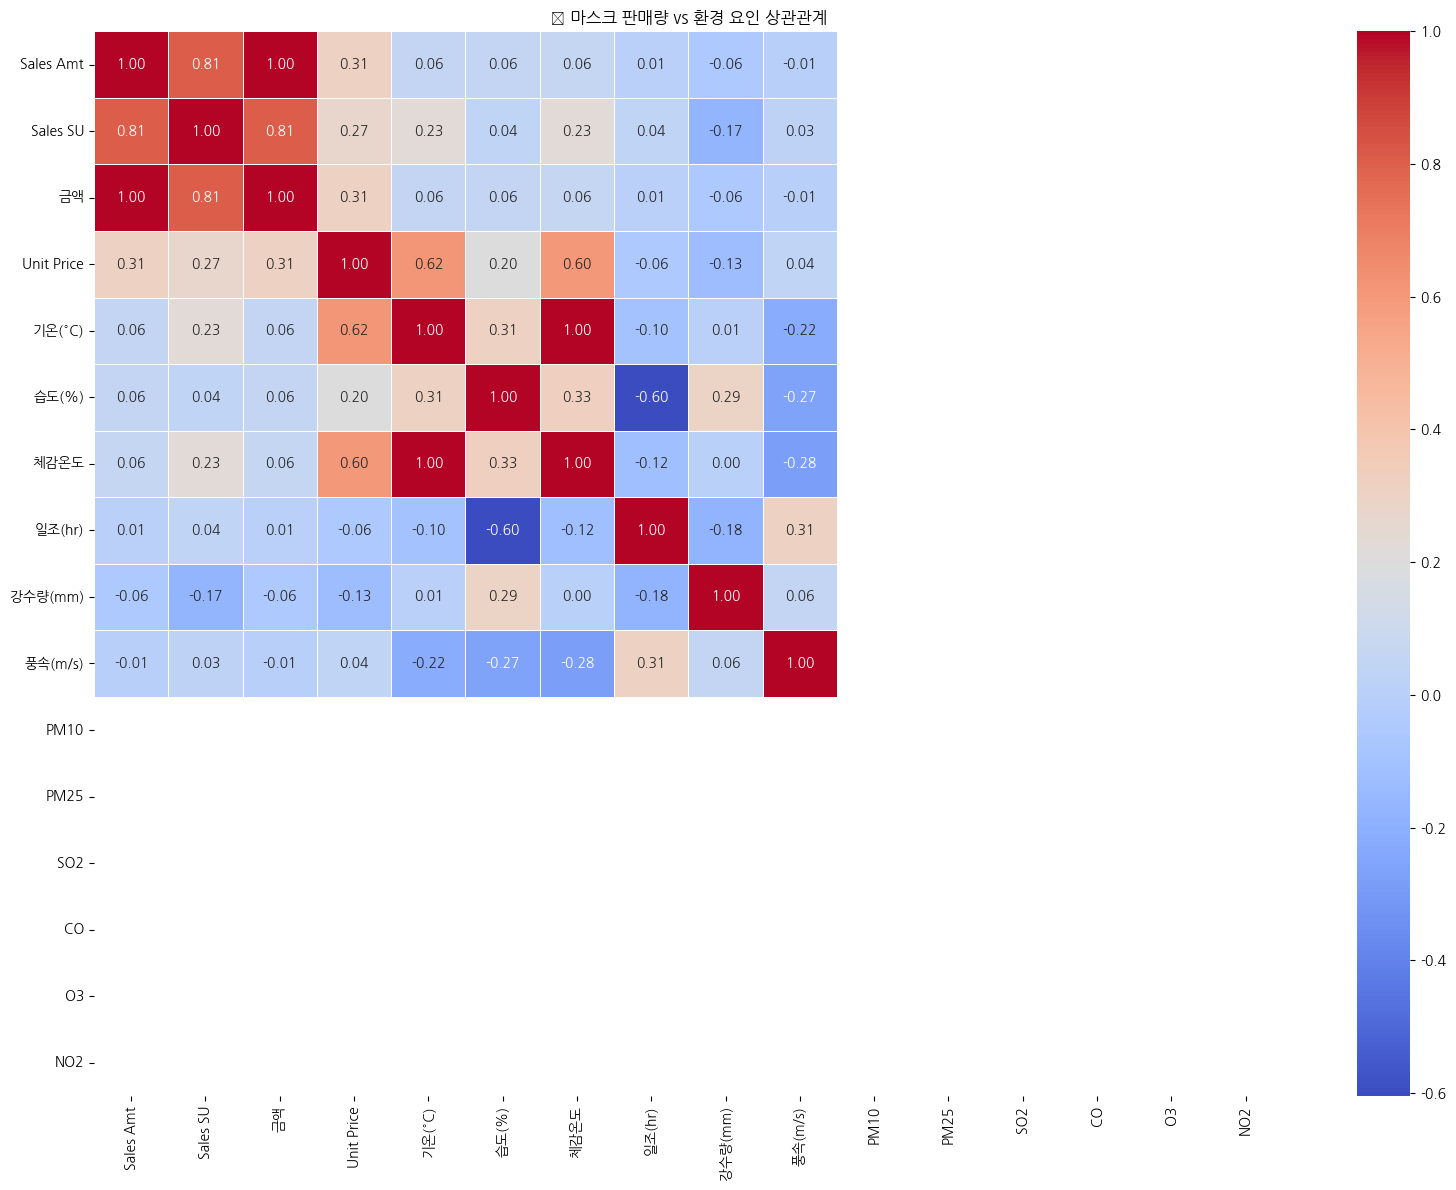

✅ 이미지 저장 완료: ./correlation/correlation_matrix.png


In [19]:
# 상관계수 추출

# 1. 데이터 불러오기
df = pd.read_csv("./correlation/merged_sales_weather_dust.csv")
df['날짜'] = pd.to_datetime(df['날짜'])

# 2. 사용할 컬럼 정의
target_cols = ['Sales Amt', 'Sales SU', '금액', 'Unit Price',
               '기온(°C)', '습도(%)', '체감온도', '일조(hr)', '강수량(mm)', '풍속(m/s)',
               'PM10', 'PM25', 'SO2', 'CO', 'O3', 'NO2']
corr_cols = [col for col in target_cols if col in df.columns]

# 3. 상관계수 계산
corr_matrix = df[corr_cols].corr()

# 4. 시각화 및 이미지 저장
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title("📊 마스크 판매량 vs 환경 요인 상관관계")
plt.tight_layout()

# 이미지 저장
plt.savefig("./correlation/correlation_matrix.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print("✅ 이미지 저장 완료: ./correlation/correlation_matrix.png")
